In [2]:
# https://www.yuque.com/huangzhongqing/eozhay/mrqitx#lFvy7
import numpy as np
import os
import pandas as pd

In [3]:
filepath = "C://Users//huituo//Desktop//慧拓任务//数据标注//崔凯//1_50//1_50//3d//"
files = os.listdir(filepath)
data = []
for file in files:
    with open(filepath+file, 'r') as f:
        for line in f.readlines():
            data.append(line.strip().split())

In [11]:
df = pd.DataFrame(data)
# kitti数据集
# df = df.loc[:, [0, 11, 12, 13, 14]] # 修改

# ouster 3D bounding box: (label，cx, cy, cz, dx, dy, dz, heading)
# Truck 6 14.611415 18.608795 0.46999997 13.309997 8.250002 7.34 -3.0455952326404025
df = df.loc[:, [0, 2, 3, 4, 7]] # 修改
df.columns = ['type', 'x', 'y', 'z', 'heading']

In [12]:
for i in df.columns:
    if i == 'type': # 不包含type这一列
        continue
    else:
        df.loc[:, i] = df.loc[:, i].astype(float) # 字符串转float

In [13]:
df.describe()

,x,y,z,heading
count,26.000000,26.000000,26.000000,26.000000
mean,17.208978,15.946039,-0.484808,5.430385
std,16.587551,1.934504,1.608609,2.383516
min,-8.340822,11.488874,-3.425000,1.730000
25%,4.926990,15.228719,-1.400000,3.405000
50%,14.998475,16.240091,-0.532500,7.090000
75%,27.764175,17.539118,0.601250,7.300000
max,55.029050,18.608795,2.395000,7.550000


In [14]:
df[df.loc[:, 'type']=='Truck'].loc[:, ['z']]

,z
0,0.470
1,0.200
3,-0.690
5,-1.325
7,1.875
9,2.395
11,1.715
13,2.175
14,1.085
15,0.645


In [22]:
# num_truck = df[df.loc[:, 'type']=='Truck'].shape[0]
# num_auxiliary = df[df.loc[:, 'type']=='Auxiliary'].shape[0]
# num_car = df[df.loc[:, 'type']=='Car'].shape[0]
# print("Truck:{},Auxiliary:{},Car:{}, ".format(num_truck, num_auxiliary, num_car))


list_name = ['Truck','Auxiliary','Car','Excavator','Widebody','Pedestrian','Others']
nums_label = [df[df.loc[:, 'type']==name].shape[0] for name in list_name]
nums_label

[15, 0, 6, 0, 0, 0, 5]

<AxesSubplot:>

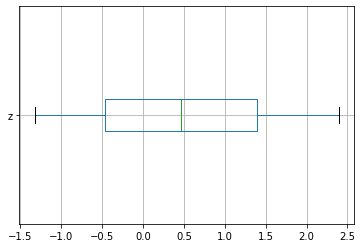

In [16]:
df[df.loc[:, 'type']=='Truck'].loc[:, ['z']].boxplot(vert=False)